#  Space Missions 2022Q2

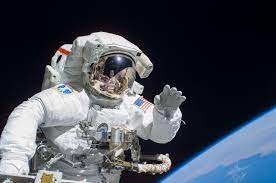

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
sns.set(rc={'figure.figsize':(15,5)})


In [51]:
df = pd.read_csv(r"C:/Users/charl.DESKTOP-E4F6RTP/OneDrive/Documents/Portfolio/MAVEN competition/Space+Missions/space_missions.csv",encoding = "ISO-8859-1",parse_dates=['Date'])

In [52]:
df

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure
...,...,...,...,...,...,...,...,...,...
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022-07-22,17:39:00,Falcon 9 Block 5,Starlink Group 3-2,Active,67,Success
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",2022-07-24,06:22:00,Long March 5B,Wentian,Active,NaN,Success
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-07-24,13:38:00,Falcon 9 Block 5,Starlink Group 4-25,Active,67,Success
4628,CAS Space,"Jiuquan Satellite Launch Center, China",2022-07-27,04:12:00,Zhongke-1A,Demo Flight,Active,NaN,Success


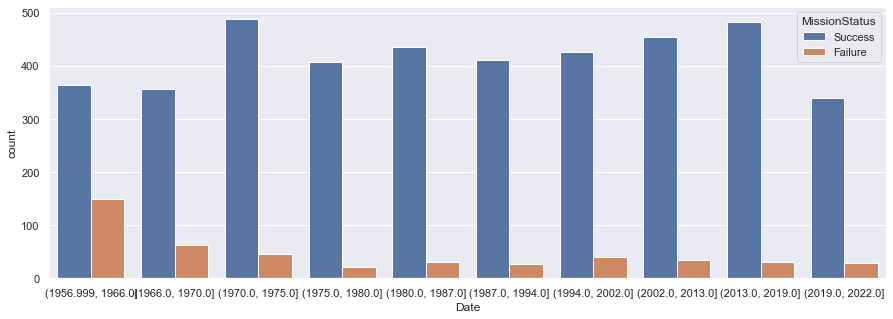

In [122]:
ax = sns.countplot(data=df, x = pd.qcut(df.Date.dt.year,q=10),hue='MissionStatus')
plt.show()
#As expected, higher chance of failure in the beginning

In [54]:
split = df.Location.str.split(',',expand=True)

In [55]:
split[3].fillna(split[2],inplace=True)

In [56]:
split[3].fillna(split[1],inplace=True)

In [57]:
df['Country']=split[3]

In [58]:
df.Country = df.Country.str.strip()

Replacing values

In [59]:
df.Country.replace(to_replace="Shahrud Missile Test Site",value="Iran",inplace=True)
df.Country.replace(to_replace="Gran Canaria",value="USA",inplace=True)
df.Country.replace(to_replace="Pacific Ocean",value="Norway/Russia/Ukraine/USA",inplace=True)
df.Country.replace(to_replace="New Mexico",value="USA",inplace=True)
df.Country.replace(to_replace="Yellow Sea",value="China",inplace=True)
df.Country.replace(to_replace="Pacific Missile Range Facility",value="USA",inplace=True)
df.Country.replace(to_replace="Barents Sea",value="USA",inplace=True)
df.Country.replace(to_replace="Alaska",value="USA",inplace=True)
df.Country.replace(to_replace="New Zealand",value="USA/New Zealand",inplace=True)
df.Country.replace(to_replace="Kenya",value="Italy/Kenya",inplace=True)
df.loc[(df.Country=="Kazakhstan")&(df.Company=='Kosmotras'),'Country']='Russia/Ukraine/Kazakhstan'
df.loc[(df.Country=="Kazakhstan")&(df.Company=='ILS'),'Country']='USA/Russia'
df.Country.replace(to_replace="Kazakhstan",value="USSR/Russia",inplace=True)
df.Country.replace(to_replace="Russia",value="USSR/Russia",inplace=True)

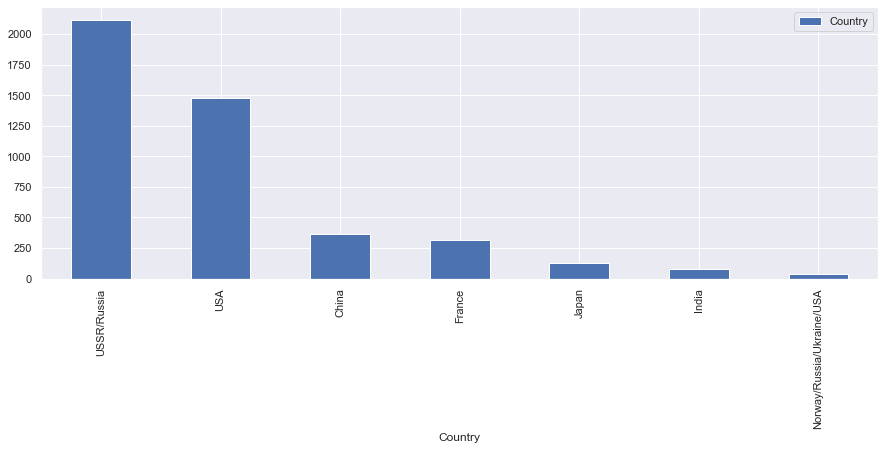

In [123]:
pd.DataFrame(df.groupby('Country').Country.count()).nlargest(7,columns='Country').plot(kind="bar")
plt.show()

In [61]:
df.Price = df.Price.str.replace(',',"")
df.Price = df.Price.astype("float")

In [62]:
df.MissionStatus.replace(to_replace=['Partial Failure', 'Prelaunch Failure'],value='Failure',inplace=True)

In [63]:
#getting dummy variables
df['success_dummy'] = pd.get_dummies(df.MissionStatus,drop_first=True)
df['active_dummy']= pd.get_dummies(df.RocketStatus,drop_first=True)

In [64]:
df.corr()
#1 in success_dummy = Success
#1 in active_dummy = Retired

,Price,success_dummy,active_dummy
Price,1.000000,0.047864,0.343456
success_dummy,0.047864,1.000000,-0.057411
active_dummy,0.343456,-0.057411,1.000000


C:\Users\charl.DESKTOP-E4F6RTP\anaconda3\envs\geo_env\lib\site-packages\numpy\lib\nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


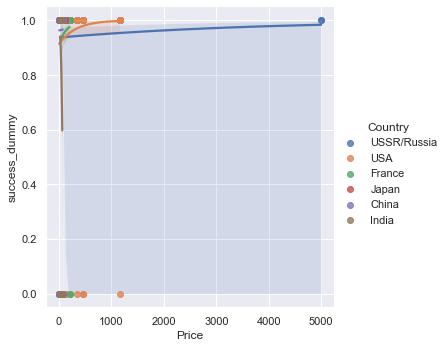

In [124]:
ax = sns.lmplot(data=df.loc[df.Country.isin(['USA','USSR/Russia','Japan','India','China','France'])],x='Price',y='success_dummy',logistic=True,hue='Country')
plt.show()

Taking a close look at India because it seems the more they spend = higher chance of failure

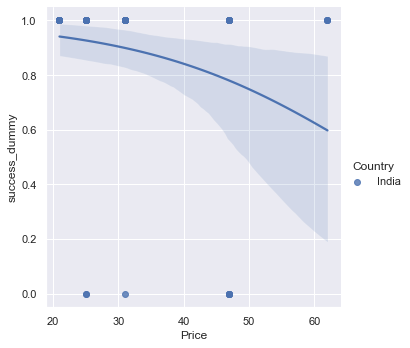

In [125]:
ax = sns.lmplot(data=df.loc[df.Country=='India'],x='Price',y='success_dummy',logistic=True,hue='Country')
plt.show()

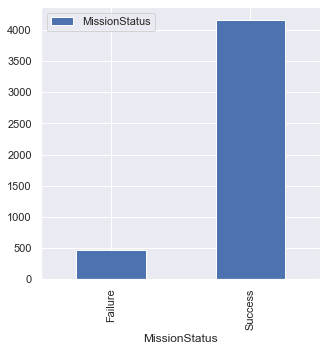

In [126]:
pd.DataFrame(df.groupby('MissionStatus').MissionStatus.count()).plot(kind="bar",figsize=(5,5))
plt.show()

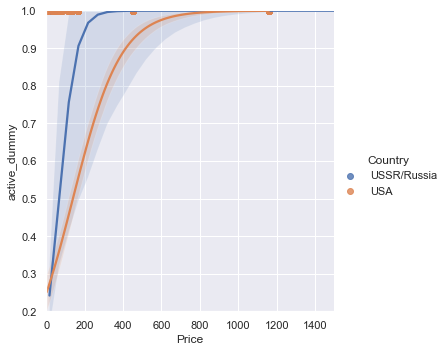

In [69]:
ax=sns.lmplot(data=df.loc[df.Country.isin(['USA','USSR/Russia'])],x='Price',y='active_dummy',logistic=True,hue='Country')
plt.xlim(0,1500)
plt.ylim(.2,1)
plt.show()

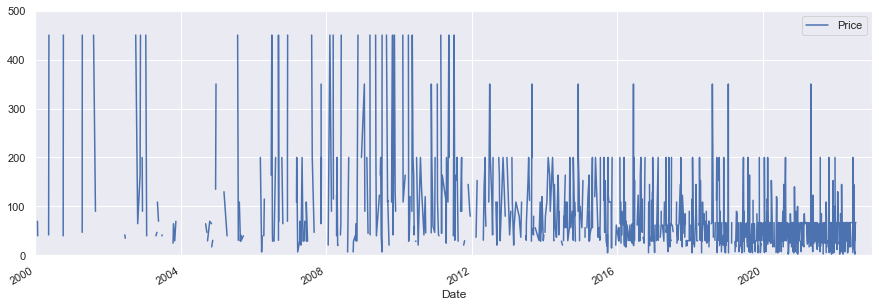

In [127]:
df.plot(x='Date',y='Price')
plt.ylim(0,500)
plt.xlim('2000-01-01','2023-01-01')
plt.show()
#Missing a lot of price data

In [78]:
#look at apollo missions
df.loc[df.Mission.str.contains('Apollo')].Price.sum()

13920.0

In [79]:
#look at USA's STS missions
df.loc[df.Mission.str.contains('STS')].Price.sum()

60750.0

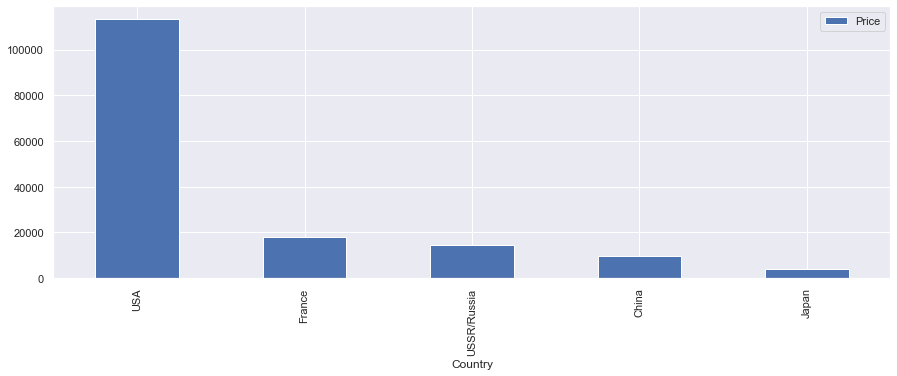

In [128]:
pd.DataFrame(df.groupby('Country').Price.sum()).sort_values('Price',ascending=False).nlargest(5,'Price').plot(kind="bar")
plt.show()

### Geocoding

In [130]:
pd.DataFrame(df['Location'].unique(),columns=['Location'])
#158 total Launch locations

,Location
0,"Site 1/5, Baikonur Cosmodrome, Kazakhstan"
1,"LC-18A, Cape Canaveral AFS, Florida, USA"
2,"LC-26A, Cape Canaveral AFS, Florida, USA"
3,"LC-5, Cape Canaveral AFS, Florida, USA"
4,"Douglas F4D Skyray, Naval Air Station Point Mu..."
...,...
153,"SLC-3E, Vandenberg SFB, California, USA"
154,"LC-2, Naro Space Center, South Korea"
155,"SLC-46, Cape Canaveral SFS, Florida, USA"
156,"Rocket Lab LC-1B, MÄhia Peninsula, New Zealand"


In [75]:
import requests
API_Key = #enter your own
main_subject_address = pd.DataFrame(df['Location'].unique(),columns=['Location'])
data_list = []
header = True
for i in range(len(main_subject_address)):
    try:
        #change column names as needed. First one should be used as an ID
        address = main_subject_address['Location'][i].replace(" ", "+")
        address_cleaned = address.replace("#", "")
        r = requests.get("https://maps.googleapis.com/maps/api/geocode/json?address=" + address_cleaned+ "&key=" + API_Key)
        request_data = r.json()
        data_list.append([main_subject_address['Location'][i], request_data["results"][0]["geometry"]['location']['lat'] , request_data["results"][0]["geometry"]['location']['lng']])
        print(data_list)
        #Insert the columns you want to keep here
        geocode = pd.DataFrame(data_list, columns=('Location', 'lat', 'long'))
        header= False
    except:
        pass

SyntaxError: invalid syntax (2337888937.py, line 2)

In [36]:
geocode

,Location,lat,long
0,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",45.964585,63.305243
1,"LC-18A, Cape Canaveral AFS, Florida, USA",28.448986,-80.561827
2,"LC-26A, Cape Canaveral AFS, Florida, USA",28.492378,-80.576859
3,"LC-5, Cape Canaveral AFS, Florida, USA",28.439421,-80.573307
4,"Douglas F4D Skyray, Naval Air Station Point Mu...",34.112441,-119.102441
...,...,...,...
150,"SLC-2W, Vandenberg SFB, California, USA",34.742027,-120.572440
151,"SLC-3E, Vandenberg SFB, California, USA",34.742027,-120.572440
152,"LC-2, Naro Space Center, South Korea",34.441730,127.534111
153,"SLC-46, Cape Canaveral SFS, Florida, USA",28.458491,-80.528403


In [39]:
df = pd.merge(left=df,right=geocode,on='Location')

In [63]:
df = pd.read_csv(r"C:/Users/charl.DESKTOP-E4F6RTP/OneDrive/Documents/Portfolio/MAVEN competition/Space+Missions/space_missions_python.csv",encoding = "ISO-8859-1",parse_dates=['Date']).drop(columns=['Unnamed: 0'])

In [65]:
df.groupby('Country').Country.count()

Country
Australia                       6
Brazil                          3
China                         368
France                        318
India                          82
Iran                           17
Israel                         11
Italy/Kenya                     9
Japan                         130
North Korea                     5
Norway/Russia/Ukraine/USA      36
Russia/Ukraine/Kazakhstan      12
South Korea                     5
USA                          1474
USA/New Zealand                13
USA/Russia                      6
USSR/Russia                  2117
Name: Country, dtype: int64